# G04 Nhãn và chú thích

## Mục đích

Sau khi đã vẽ được biểu đồ, chúng ta thường phải điều chỉnh lại nhãn (label) trên các trục tọa độ, thêm tiêu đề, và định dạng lại chú thích (legend). Matplotlib cho phép chúng ta thoải mái thực hiện các tùy biến này.


## Các label chính của plot

Để giúp bạn hình dung các loại label mà chúng ta có thể điều chỉnh, hãy cùng xem hình ảnh mô phỏng dưới đây. Thông qua đó bạn cũng có thể tìm hiểu luôn các lệnh để thay đổi label cho plot tạo ra từ Matplotlib.

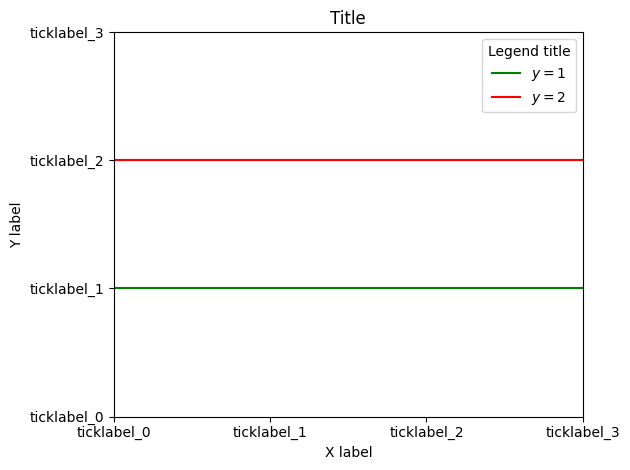

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(tight_layout=True)

ax.axhline(1, color="green", label="$y=1$")
ax.axhline(2, color="red", label="$y=2$")

ax.set_ylim(0, 3)

ax.legend(title="Legend title")

ax.set_title("Title")
ax.set_xlabel("X label")
ax.set_ylabel("Y label")

ticks = range(4)
ax.set_xticks(ticks, [f"ticklabel_{tick}" for tick in ticks])
ax.set_yticks(ticks, [f"ticklabel_{tick}" for tick in ticks])

plt.show()

### Title và axis label

Khác với biểu đồ của ggplot2 trong R có khá nhiều nhãn, biểu đồ của Python chỉ có ba nhãn chính là tiêu đề (title), nhãn trục X (X-axis label) và nhãn trục Y (Y-axis label). Có hai cách để thiết lập các nhãn này, hoặc bạn sử dụng hàm trong thư viện con `pyplot` (ví dụ, `plt.title()`), hoặc sử dụng các hàm của lớp `Axes` (ví dụ, `ax.set_title()`). Chúng ta sẽ chỉ tìm hiểu cách thứ hai.

Hãy vẽ lại scatter plot biểu diễn mối liên quan giữa IRP 4s và áp lực khi nghỉ của cơ thắt thực quản dưới (LES).

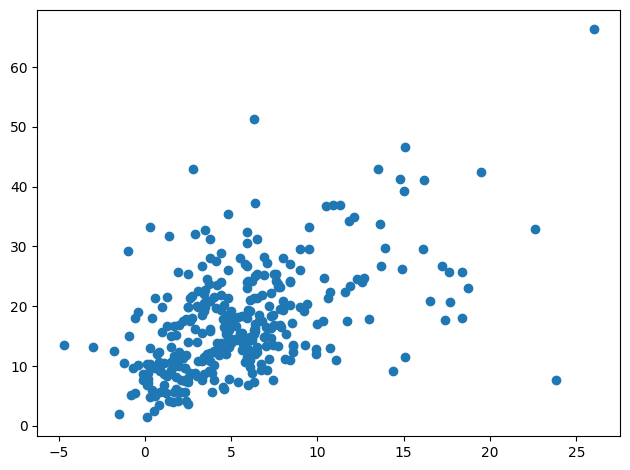

In [7]:
import pandas as pd

sex_dict = {0: "Nữ", 1: "Nam"}
eso_vtq_dict = {0: "Không VTQ", 1: "VTQ LA A", 2: "VTQ LA B", 3: "VTQ LA C"}

d = pd.read_excel("../04_data/hrm.xlsx") \
    .replace({
        "sex": sex_dict,
    })

# Bắt đầu vẽ
fig, ax = plt.subplots(tight_layout=True)
ax.scatter(d["les_irp4s"], d["les_baserestp"])
plt.show()

Như bạn thấy, biểu đồ tạo ra không có nhãn nào cả. Chúng ta sẽ thêm nhãn vào cho biểu đồ.

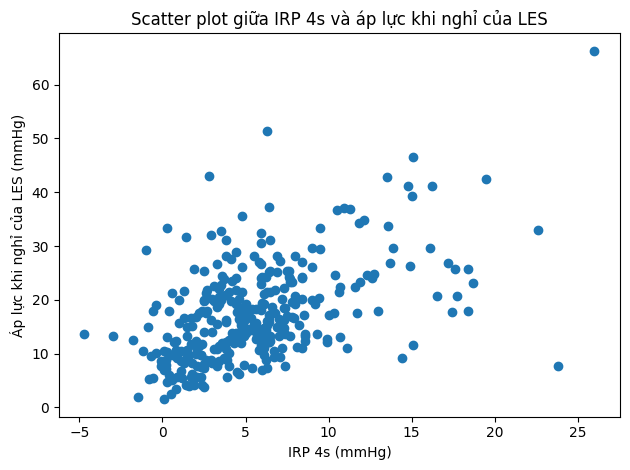

In [8]:
fig, ax = plt.subplots(tight_layout=True)
ax.scatter(d["les_irp4s"], d["les_baserestp"])

# Thêm label
ax.set_title("Scatter plot giữa IRP 4s và áp lực khi nghỉ của LES")
ax.set_xlabel("IRP 4s (mmHg)")
ax.set_ylabel("Áp lực khi nghỉ của LES (mmHg)")

plt.show()

Bạn có thể tùy biến vị trí của các nhãn này. Chẳng hạn chúng ta muốn tiêu đề của biểu đồ nằm bên trái, và hai nhãn của trục tọa độ cách xa các số trên trục tọa độ một chút.

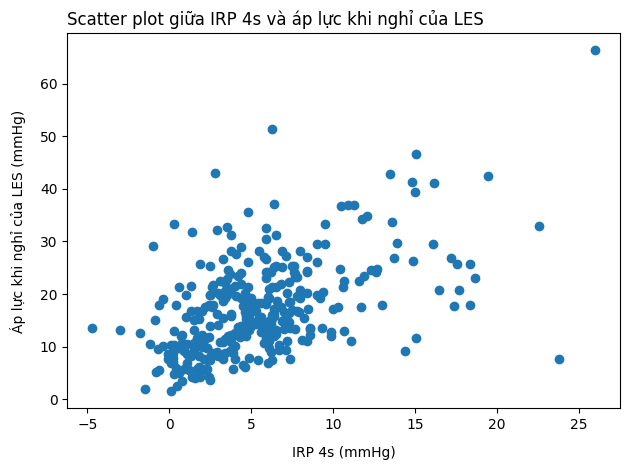

In [9]:
fig, ax = plt.subplots(tight_layout=True)
ax.scatter(d["les_irp4s"], d["les_baserestp"])

# Thêm label
ax.set_title("Scatter plot giữa IRP 4s và áp lực khi nghỉ của LES", loc="left")
ax.set_xlabel("IRP 4s (mmHg)", labelpad=10)
ax.set_ylabel("Áp lực khi nghỉ của LES (mmHg)", labelpad=10)

plt.show()

### Tick và tick label

Các số trên các trục tọa độ được gọi là tick (vạch). Thường mỗi vạch này sẽ có một nhãn. Matplotlib chia vạch làm hai loại là vạch chính (major tick) và vạch phụ (minor tick). Chúng ta sẽ nói về vạch chính và vạch phụ trong một bài khác, bạn chỉ cần biết rằng chúng ta có thể tùy biến vị trí của các vạch chính / phụ cũng như nhãn của chúng.

Nếu không thiết lập trước, vạch ở trên trục tọa độ chỉ được tạo ra tại thời điểm vẽ biểu đồ, do Matplotlib phải cân nhắc nhiều vấn đề về đồ họa như độ phân giải, kích thước font, v.v. trước khi vẽ. Việc thiết lập trước các thông số này khá "nguy hiểm" nếu bạn không biết trước khoảng giới hạn của các giá trị; chẳng hạn, các giá trị X từ 0 đến 1 nhưng bạn lại đặt khoảng giá trị của vạch trên trục X từ 2 đến 3.

Trong trường hợp bạn khá chắc chắn về nội dung sẽ hiển thị trong plot, bạn có thể tùy biến các vạch này. Hãy cùng xem ví dụ dưới đây, khi chúng ta vẽ box plot so sánh IRP 4s giữa nam và nữ.

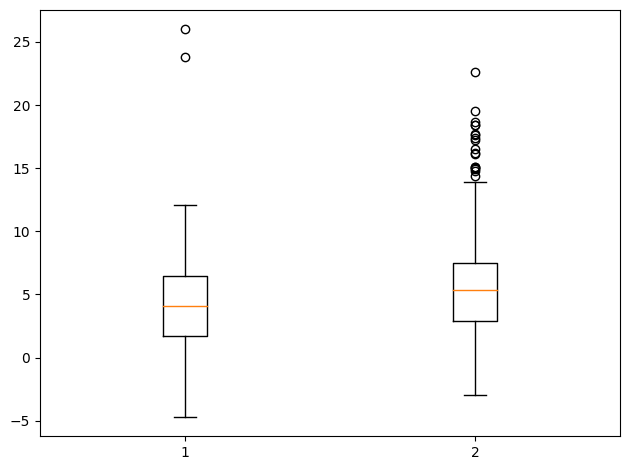

In [14]:
d_grpby = d.groupby("sex")
data = [d_grpby.get_group(group)["les_irp4s"].dropna() for group in d_grpby.groups]

fig, ax = plt.subplots(tight_layout=True)
ax.boxplot(data)
plt.show()

Chúng ta muốn thiết lập lại nhãn của các vạch trên trục X để biết box nào là của giới tính nào.

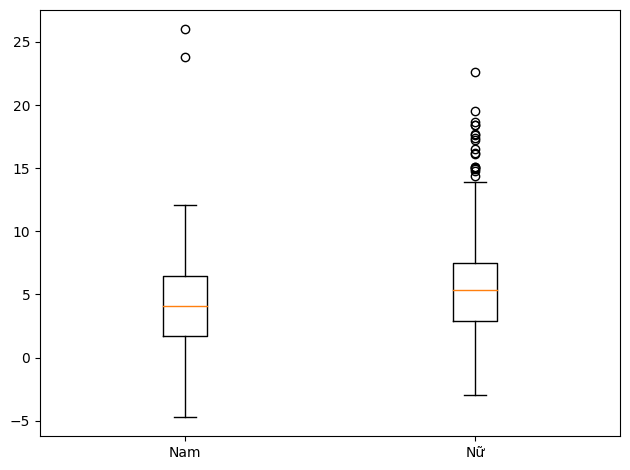

In [15]:
fig, ax = plt.subplots(tight_layout=True)
ax.boxplot(data)
ax.set_xticklabels(d_grpby.groups)
plt.show()

Bạn cũng có thể thiết lập danh sách nhãn ngay trong hàm `ax.boxplot()`.

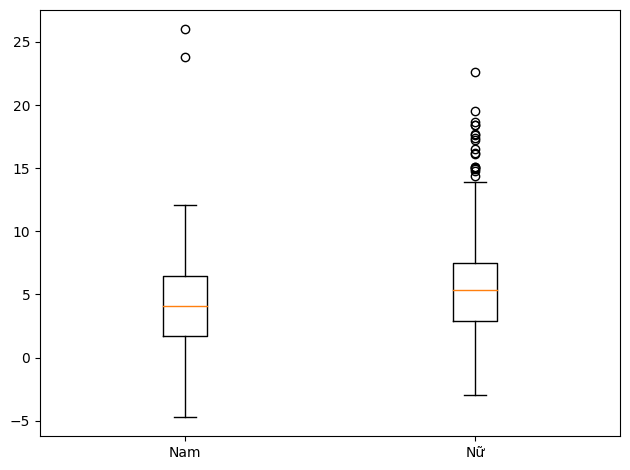

In [16]:
fig, ax = plt.subplots(tight_layout=True)
ax.boxplot(data, labels=d_grpby.groups)
plt.show()

## Chú thích

Chú thích hay legend là một khung ghi chú các nhãn cho các nhóm khác nhau trong plot giúp người dùng phân biệt các nhóm này. Do vậy, thông thường chúng ta sẽ gán nhãn cho hình vẽ của các nhóm trước, sau đó dùng hàm `ax.legend()` để hiển thị chú thích.

Dưới đây chúng ta sẽ vẽ scatter plot ở đầu bài nhưng phân theo nhóm giới tính.

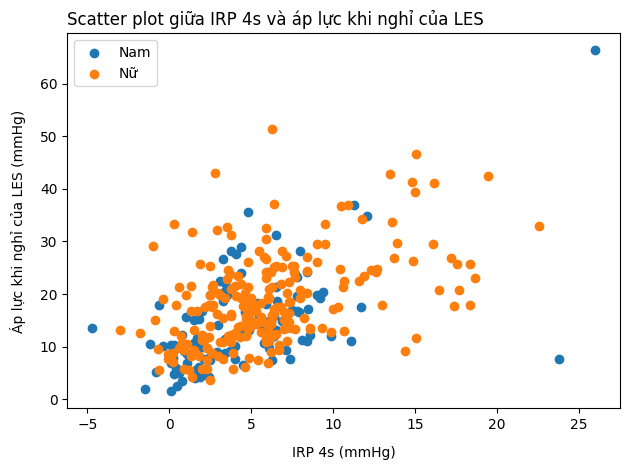

In [17]:
fig, ax = plt.subplots(tight_layout=True)

d_grpby = d.groupby("sex")
for group in d_grpby.groups:
    data = d_grpby.get_group(group)
    ax.scatter(data["les_irp4s"], data["les_baserestp"], label=group)

ax.set_title("Scatter plot giữa IRP 4s và áp lực khi nghỉ của LES", loc="left")
ax.set_xlabel("IRP 4s (mmHg)", labelpad=10)
ax.set_ylabel("Áp lực khi nghỉ của LES (mmHg)", labelpad=10)

ax.legend()

plt.show()

Như bạn thấy, không những Matplotlib giúp chúng ta hiển thị hai nhóm giới tính và khung chú thích, thư viện này còn tự động đổi màu của các chấm trên scatter plot để phân biệt hai nhóm với nhau. Chúng ta còn có thể thay đổi các đặc điểm khác của các chấm, nhưng đó sẽ là một bài khác.

Hãy xem một số tùy biến cho chú thích. Chúng ta sẽ thêm tiêu đề cho khung chú thích, giảm cỡ chữ, và bỏ đường bao xung quanh.

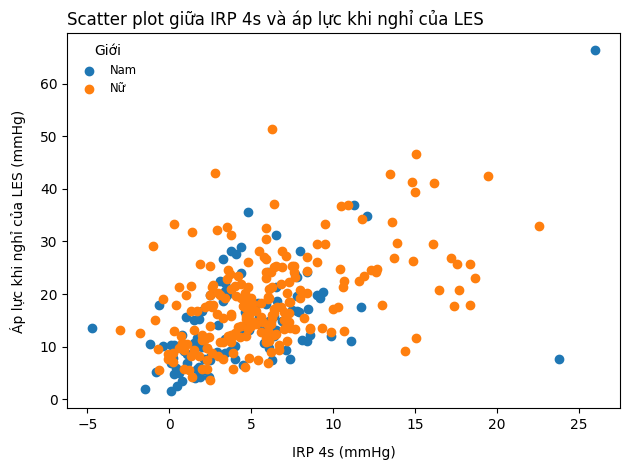

In [18]:
fig, ax = plt.subplots(tight_layout=True)

d_grpby = d.groupby("sex")
for group in d_grpby.groups:
    data = d_grpby.get_group(group)
    ax.scatter(data["les_irp4s"], data["les_baserestp"], label=group)

ax.set_title("Scatter plot giữa IRP 4s và áp lực khi nghỉ của LES", loc="left")
ax.set_xlabel("IRP 4s (mmHg)", labelpad=10)
ax.set_ylabel("Áp lực khi nghỉ của LES (mmHg)", labelpad=10)

ax.legend(title="Giới", frameon=False, fontsize="small")

plt.show()

Mặc định, chú thích được đặt ở chỗ phù hợp nhất (không đè lên các hình vẽ). Bạn có thể thay đổi vị trí của khung chú thích. Ví dụ, chúng ta đưa khung chú thích ra ngoài và bên phải hệ trục tọa độ. Bạn xem thêm chi tiết ở [đây](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) nhé.

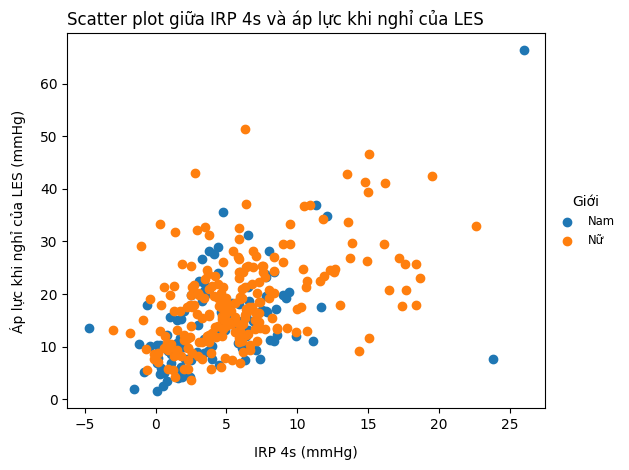

In [23]:
fig, ax = plt.subplots(tight_layout=True)

d_grpby = d.groupby("sex")
for group in d_grpby.groups:
    data = d_grpby.get_group(group)
    ax.scatter(data["les_irp4s"], data["les_baserestp"], label=group)

ax.set_title("Scatter plot giữa IRP 4s và áp lực khi nghỉ của LES", loc="left")
ax.set_xlabel("IRP 4s (mmHg)", labelpad=10)
ax.set_ylabel("Áp lực khi nghỉ của LES (mmHg)", labelpad=10)

ax.legend(title="Giới", frameon=False, fontsize="small",
    loc="center left", bbox_to_anchor=[1, 0.5])

plt.show()

---

[Bài trước](./03_plot.ipynb) - [Danh sách bài](../README.md) - [Bài sau]()